In [6]:
from jia_sims import *
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
N = 32
Aj = fast_gaussian(lambda k: [k**-1 if k else 0], d=2)[0]

In [38]:
Aj

array([[ 0.17242845, -0.4847987 ,  0.18944679, ...,  0.05175748,
        -0.21531973,  0.26825897],
       [ 0.69484612,  0.40854175,  0.06205124, ..., -0.01519942,
         0.3997127 , -0.1738186 ],
       [ 0.43763665,  0.03978502,  0.09472075, ..., -0.44286775,
         0.38153395,  0.0418086 ],
       ...,
       [ 0.43977025, -0.15585111,  0.10989563, ...,  0.12437931,
        -0.29370356,  0.05540618],
       [ 0.33897957,  0.03504015,  0.15943869, ..., -0.49903581,
        -0.22866283,  0.2069756 ],
       [-0.16858116, -0.07280936, -0.03606297, ..., -0.30408342,
         0.03734082, -0.15012554]])

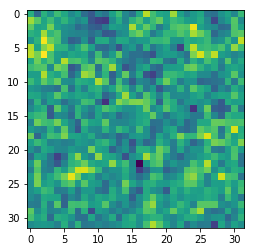

In [39]:
plt.imshow(Aj)

In [40]:
Ak = fft.fft2(Aj)

In [41]:
Bj = Aj[::2,::2] + Aj[1::2,::2] + Aj[::2,1::2] + Aj[1::2,1::2]
Bk = fft.fft2(Bj)

In [42]:
angles = exp(2j*pi*arange(N//2)/N)
testing = Ak[:N//2,:N//2]*(1+angles.reshape((-1,1)))*(1+angles.reshape((1,-1)))
testing += Ak[N//2:,:N//2]*(1-angles.reshape((-1,1)))*(1+angles.reshape((1,-1)))
testing += Ak[:N//2,N//2:]*(1+angles.reshape((-1,1)))*(1-angles.reshape((1,-1)))
testing += Ak[N//2:,N//2:]*(1-angles.reshape((-1,1)))*(1-angles.reshape((1,-1)))

In [46]:
amax(abs(testing/4- Bk))

1.5888218580782548e-14

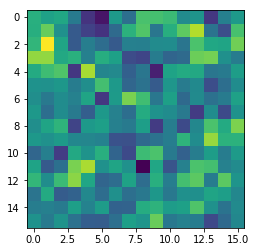

In [47]:
plt.imshow(Bj)

In [36]:
Ak[:N//2], Ak[N//2:]

(array([-1.11022302e-16+0.j        ,  3.72600458e-01-0.33987831j,
         2.08839886e+00-1.65976235j,  3.41315329e-02-3.43843617j,
         6.10689490e-01-3.2646382j ,  1.06789505e+00+2.2359669j ,
        -1.06211692e+00-2.59579369j,  1.61996164e+00-0.04600426j,
         2.09032942e+00+0.41236165j, -1.31112552e+00+0.2910626j ,
        -2.50377427e+00+1.04898154j,  1.48755454e+00-0.89302861j,
        -2.42336047e-01-2.03244352j,  1.28158723e+00-1.59942617j,
        -7.71908781e-01+0.03026097j, -3.05650829e-01+0.0516493j ]),
 array([ 0.8949681 +0.j        , -0.30565083-0.0516493j ,
        -0.77190878-0.03026097j,  1.28158723+1.59942617j,
        -0.24233605+2.03244352j,  1.48755454+0.89302861j,
        -2.50377427-1.04898154j, -1.31112552-0.2910626j ,
         2.09032942-0.41236165j,  1.61996164+0.04600426j,
        -1.06211692+2.59579369j,  1.06789505-2.2359669j ,
         0.61068949+3.2646382j ,  0.03413153+3.43843617j,
         2.08839886+1.65976235j,  0.37260046+0.33987831j]))

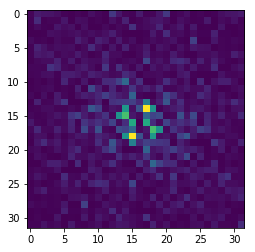

In [50]:
plt.imshow(fft.fftshift(np.abs(Ak)**2))

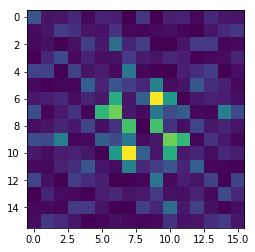

In [51]:
plt.imshow(fft.fftshift(np.abs(Bk)**2))

In [56]:
N = 256
Aj = fast_gaussian(lambda k: [k**-2 if k else 0]*100, size=N, d=2)
Ak = fft.fft2(Aj)
P = mean(abs(Ak)**2,axis=0)

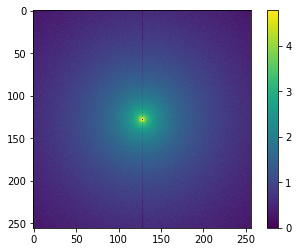

In [60]:
plt.imshow(fft.fftshift(log10(P)),vmin=0)
plt.colorbar()

In [62]:
Bj = Aj[:,::2,::2] + Aj[:,1::2,::2] + Aj[:,::2,1::2] + Aj[:,1::2,1::2]
Bk = fft.fft2(Bj)
P2 = mean(abs(Bk)**2,axis=0)

In [ ]:
k = fft.fftfreq(N)

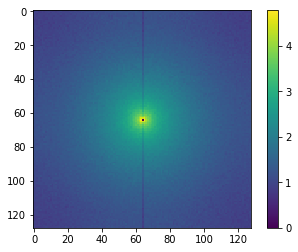

In [64]:
plt.imshow(fft.fftshift(log10(P2)),vmin=0)
plt.colorbar()